In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
unscaled_df = pd.read_csv("demo.csv")
unscaled_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(unscaled_df)

In [8]:
df = pd.DataFrame(scaled_array)
df.head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [9]:
kMeans = KMeans(n_clusters = 2)
fit_kMeans = kMeans.fit(df)

In [10]:
print(fit_kMeans.inertia_)

2599.38555935614


In [11]:
inertias = []
for i in range(2, 20):
    kMeans = KMeans(n_clusters = i)
    fit_kMeans = kMeans.fit(df)
    inertias.append(fit_kMeans.inertia_)

In [12]:
print(inertias)

[2599.3873849123083, 2149.283956221759, 1851.8408722743848, 1565.3637950617126, 1313.961987424017, 1173.0105551078711, 1050.7006193345533, 979.7866412300938, 926.5317700856991, 854.9431279186531, 802.4431804131414, 749.8230529824743, 713.4322275949813, 694.0977449112393, 654.0355494397163, 625.9868809426199, 607.126167340236, 582.7660840293813]


In [13]:
frame = pd.DataFrame({"clusters":range(2,20), 'Inertias':inertias})

<AxesSubplot:>

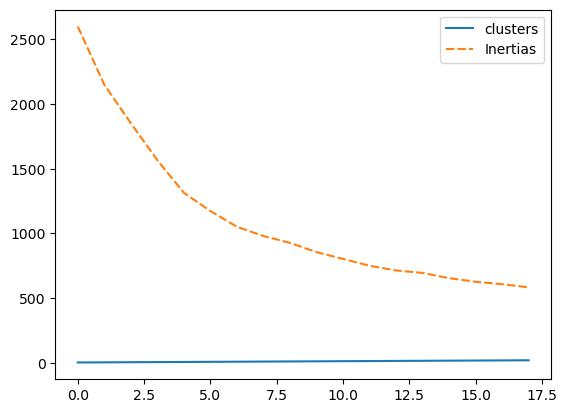

In [14]:
sns.lineplot(data=frame)

In [15]:
kMeans = KMeans(n_clusters = 6)
fit_kMeans = kMeans.fit(df)
print(fit_kMeans.inertia_)

1313.961987424017


In [16]:
predictions = fit_kMeans.predict(df)
print(predictions)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 5 0 0 0 1 1 0 5 1 1 1 5 1 0 5
 0 0 5 5 1 0 0 0 0 0 4 0 0 1 1 5 0 1 1 4 0 1 1 0 4 0 0 1 4 1 0 1 1 5 5 1 0
 0 1 1 0 1 1 1 0 0 1 0 4 4 5 1 1 1 1 4 5 0 1 0 1 1 1 0 0 0 5 1 1 0 0 0 0 1
 0 5 1 1 1 1 1 1 1 1 1 1 0 5 5 1 0 1 5 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 5 1 1 1 1 5 1 2 1
 1 1 1 0 0 1 1 1 0 1 1 5 0 3 3 0 0 3 3 3 0 3 3 3 0 3 4 3 3 0 3 0 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 0 3 3 3 3 3 4 3 3 3 3 3 3 5
 5 3 3 3 3 0 3 0 3 0 3 3 3 3 5 1 1 5 5 1 0 1 0 5 5 5 5 1 1 1 5 1 1 1 0 3 0
 3 0 0 3 0 0 0 0 0 0 0 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 5 3 3 3 3 3 0 3
 4 5 0 3 3 3 3 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 5 1 1 0 1 1 0 5 1 0 1 5 5 1 1 1 1 1 1 1 1 1 1 5 1 1 0 1 1 1 1 5 1 1 1 1 5
 0 0 1 1 1 1 5 1 0 0 1 0 1 1 0 1 0 0 5 1 5 1 1 1 5 1 1 1 5 5 0 1 1]


In [17]:
centers = kMeans.cluster_centers_

In [18]:
unscaled_centers = scaler.inverse_transform(centers)

In [1]:
unscaled_centers[0][0]

NameError: name 'unscaled_centers' is not defined